Loading model...
Model loaded successfully!


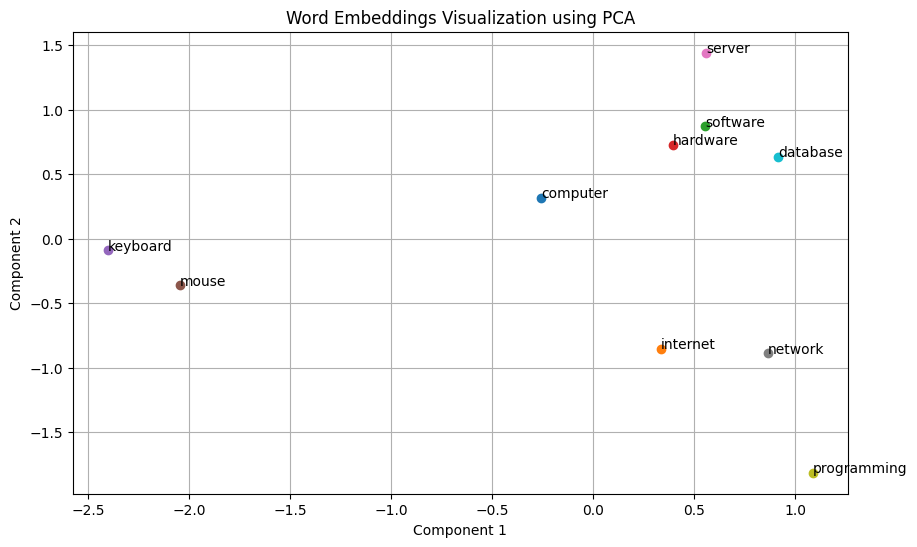

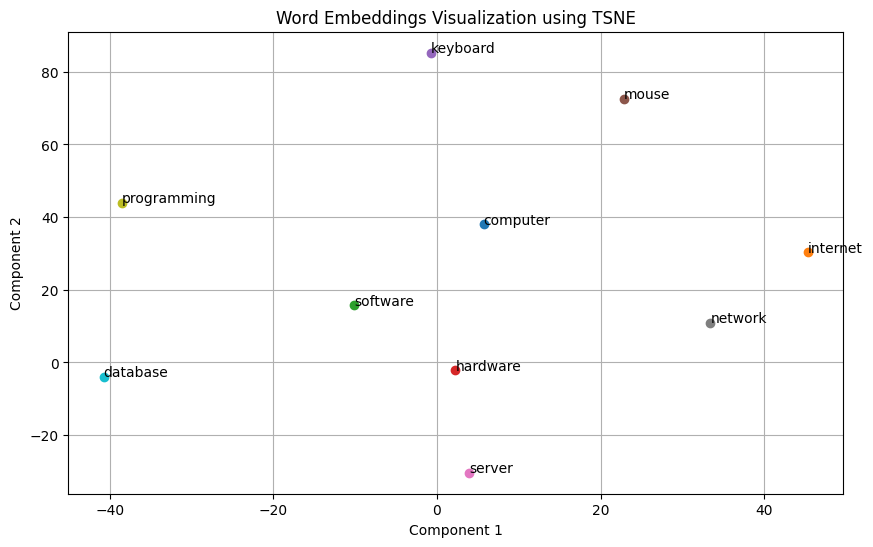


Top 5 words similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082


In [1]:
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

print("Loading model...")
model = api.load("word2vec-google-news-300")
print("Model loaded successfully!")


words = ['computer', 'internet', 'software', 'hardware', 'keyboard', 'mouse', 'server', 'network', 'programming', 'database']
vectors = np.array([model[word] for word in words])


for method in ['PCA', 'TSNE']:
    if method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)
    
    reduced_vectors = reducer.fit_transform(vectors)
    

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(f"Word Embeddings Visualization using {method}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

input_word = 'computer'
similar_words = model.most_similar(input_word, topn=5)

print(f"\nTop 5 words similar to '{input_word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")
